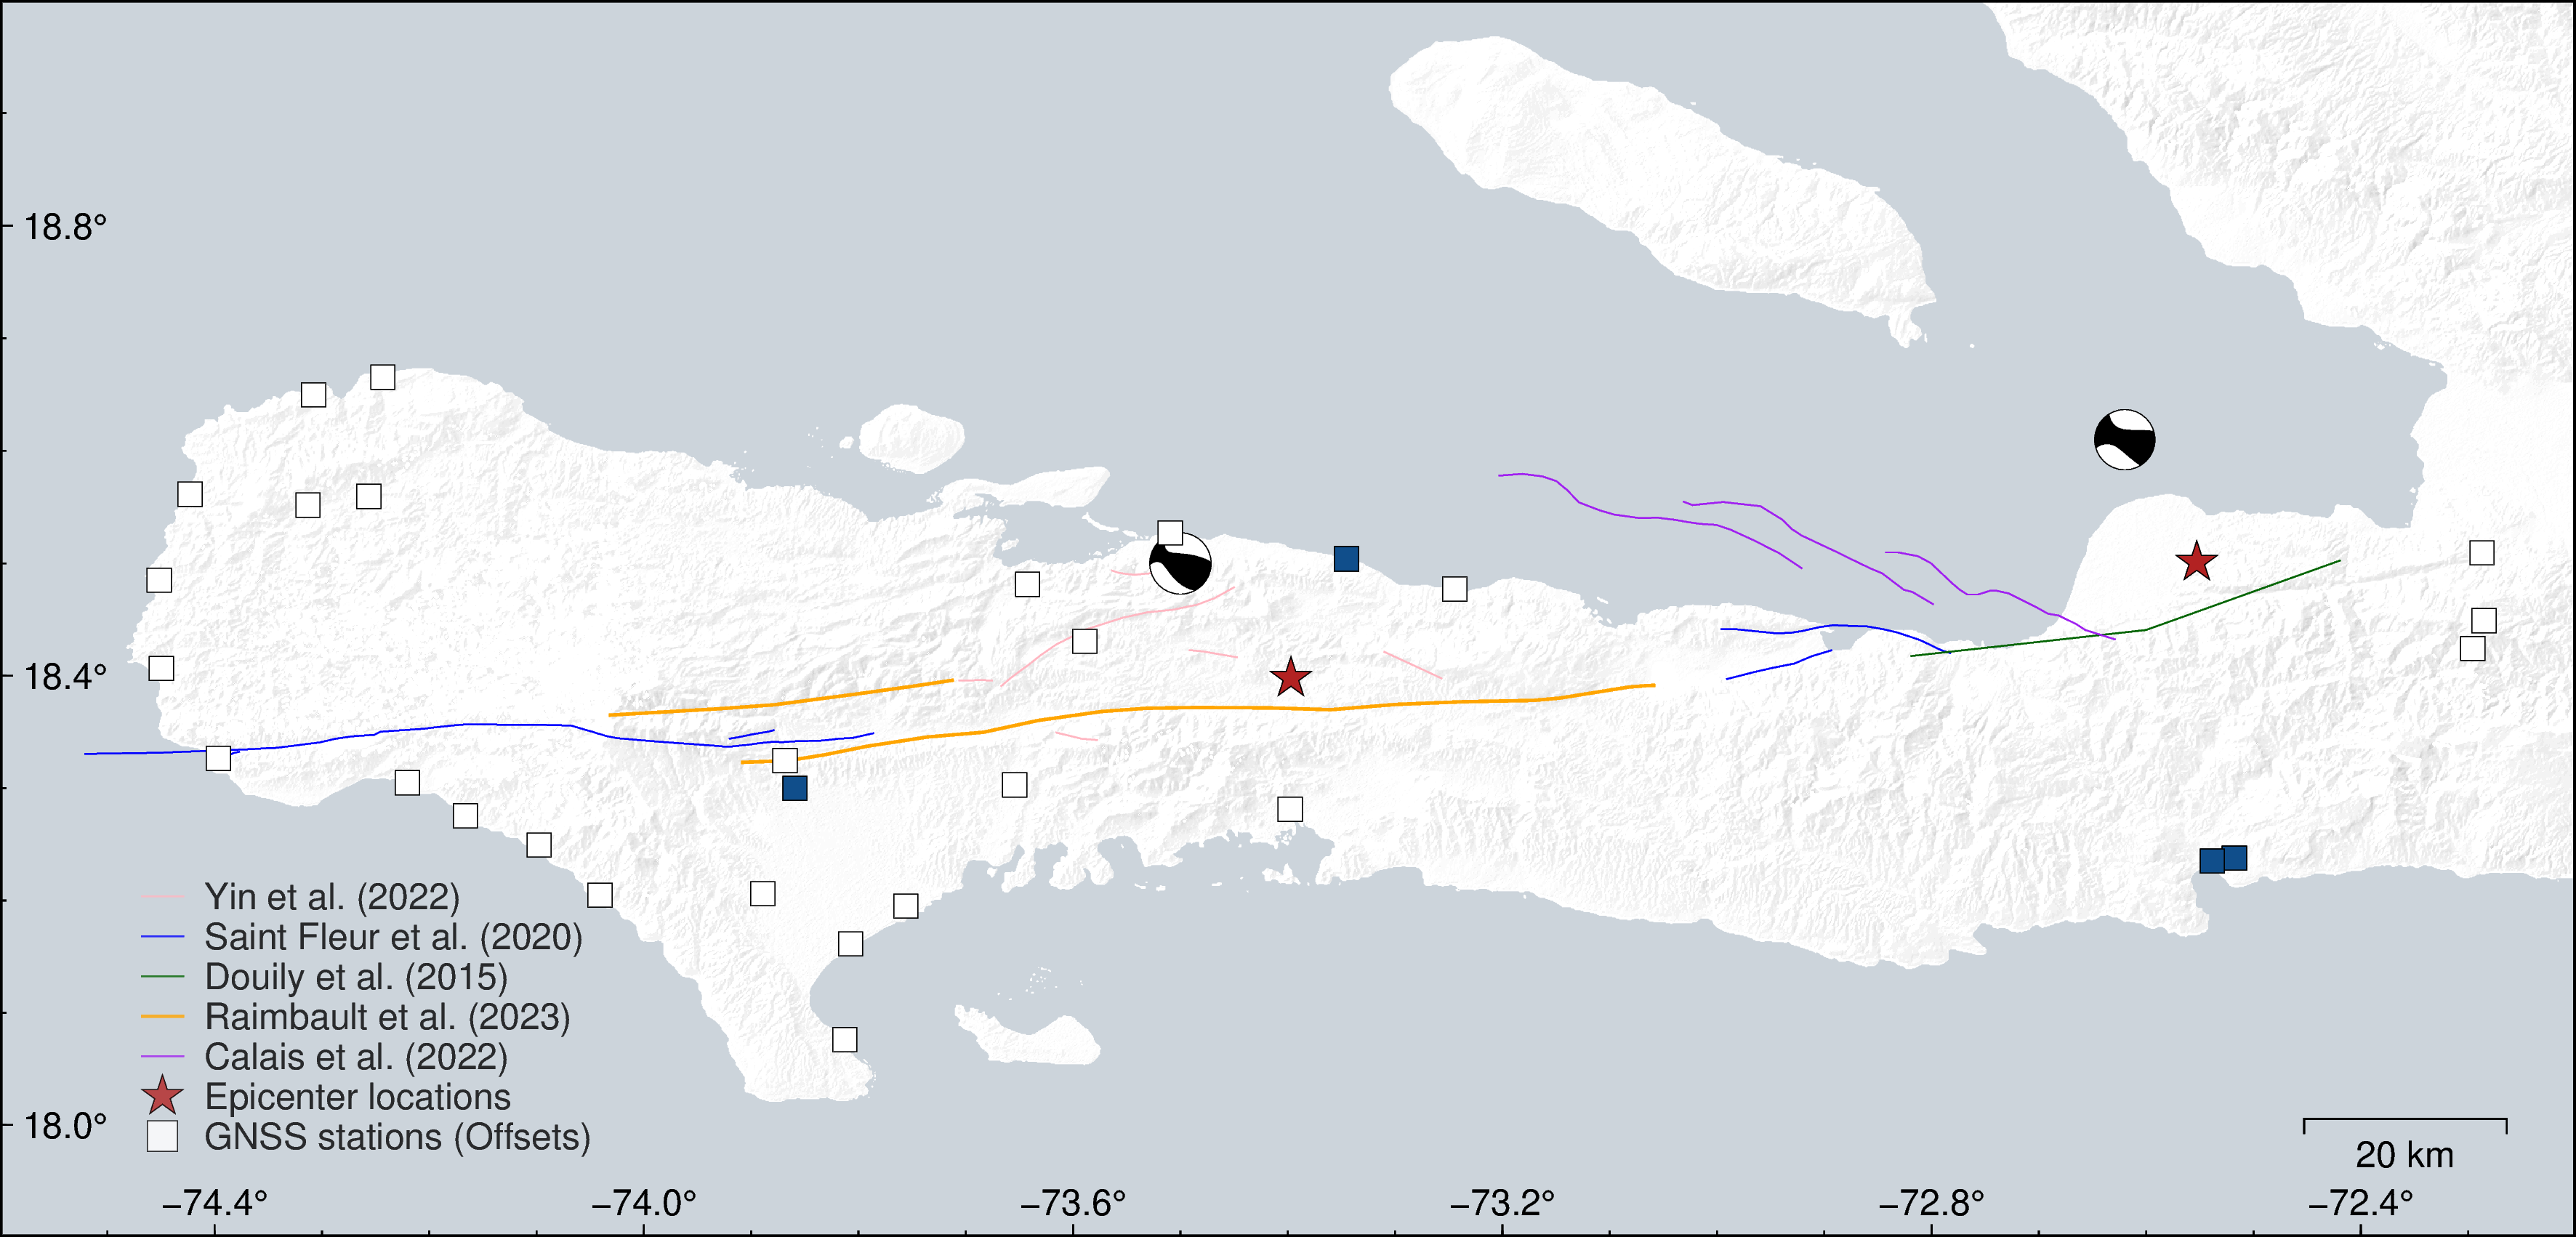

In [117]:
import pygmt
import pandas as pd
import fiona
import geopandas as gpd
import subprocess

plotpath = '/Users/hyin/ags_local/data/haiti_seissol_data/scripts/overview-fig/plots'

# Initialize figure
fig = pygmt.Figure()
# Set PyGMT universal configurations
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="inside", FONT="12p")
projection = 'M0/0/30c'

# fig.coast(shorelines=False, region=rgn, projection=projection, land="lightgrey")
rgn = [-74.6, -72.2, 17.9, 19]
fig.basemap(region=rgn, projection=projection, frame=True)

# Set up base map
pygmt.makecpt(cmap="grayC", series=[-5, -0.1, 0.1])
topopath = '/Users/hyin/ags_local/data/haiti_seissol_data/scripts/overview-fig/topo/'
fig.grdimage(grid=topopath+"hispaniola_30.norm",cmap=True)
fig.coast(shorelines=False, region=rgn, projection=projection, water='204/212/219') # water='azure2'
fig.basemap(region=rgn, projection=projection, frame="a0.4f0.1", map_scale="jBR+w20k+o0.8c/1.2c")
# To change to specific ticks, change frame="a0.2f0.05g0.5"

## Plot Faults
# faults_saintfleur_all = '/Users/hyin/agsd/projects/insar/2021_haiti/dynamic-rupture/fault-geometry/saint-fleur-2020-faults/SaintFleur_etal2020_faults.kml'
# # fig.plot(data=file, pen="1p,dimgrey", label='SaintFleur')
# fiona.drvsupport.supported_drivers['libkml'] = 'rw' # enable KML support which is disabled by default
# # fiona.drvsupport.supported_drivers['LIBKML'] = 'rw' # enable KML support which is disabled 
# gdf = gpd.read_file(faults_saintfleur_all)
# fig.plot(data=gdf, pen=".1p,black", label=f"Emre et al., 2013+S.5c")

faults_yin='/Users/hyin/agsd/projects/insar/2021_haiti/dynamic-rupture/fault-geometry/yin-insar-interpretations/final-insar-interpretations-simple_no-a.shp'
fig.plot(data=faults_yin, pen='0.5p,lightpink', transparency=0, label=f"Yin et al. (2022)+S.5c")

faults_saintfleur = '/Users/hyin/agsd/projects/insar/2021_haiti/dynamic-rupture/fault-geometry/saint-fleur-2020-faults/SaintFleur_2020_faults-subset_no-tbf.shp'
fig.plot(data=faults_saintfleur, pen='0.5p,blue', transparency=0, label=f"Saint Fleur et al. (2020)+S.5c")

faults_douilly = '/Users/hyin/agsd/projects/insar/2021_haiti/dynamic-rupture/fault-geometry/douilly-2015_2010_rupture/digitized-Léogâne_segmented_douilly-2015.shp'
fig.plot(data=faults_douilly, pen='0.5p,darkgreen', transparency=0, label=f"Douily et al. (2015)+S.5c")

faults_raimbault = '/Users/hyin/agsd/projects/insar/2021_haiti/dynamic-rupture/fault-geometry/raimbault-main-fault/raimbault-main-faults_extended-epgf.shp'
fig.plot(data=faults_raimbault, pen='1p,orange', transparency=0, label=f"Raimbault et al. (2023)+S.5c")

faults_calais = '/Users/hyin/agsd/projects/insar/2021_haiti/dynamic-rupture/fault-geometry/calais_2022_offshore-thrusts/calais_2022_tbf-simp_v01.shp'
fig.plot(data=faults_calais, pen='0.5p,purple', transparency=0, label=f"Calais et al. (2022)+S.5c")


# Plot epicenters
# 2010 M7.0 Epicenter (USGS)
fig.plot(x=-72.553, y=18.501, style="a0.5c", fill="firebrick", pen="black", transparency=0, label=f"Epicenter locations+S.5c")
# 2021 M7.2 Epicenter (USGS)
fig.plot(x=-73.397, y=18.398, style="a0.5c", fill="firebrick", pen="black", transparency=0)


# Plot Harvard CMT Solutions:
cmt_2010 = dict(mrr=1.74, mtt=-3.87, mff=2.13, mrt=-0.53, mrf=-1.06, mtf=2.74, exponent=26)
fig.meca(cmt_2010, scale=".5c", longitude=-72.62, latitude=18.61, depth=12.0)
cmt_2021 = dict(mrr=3.59, mtt=-4.13, mff=0.55, mrt=-2.35, mrf=-1.70, mtf=4.08, exponent=26)
fig.meca(cmt_2021, scale=".5c", longitude=-73.5, latitude=18.50, depth=12.0)

# Raimbault et al., 2023 GNSS observations
file = '/Users/hyin/agsd/projects/insar/2021_haiti/dynamic-rupture/observation-data/gnss/raimbault-gnss-offsets.csv'
df = pd.read_csv(file,sep=',')
fig.plot(x=df['Lon'], y=df['Lat'], style="s.4c", fill="white", pen="black", label=f"GNSS stations (Offsets)+S.5c")
# Plot the continuous sites over in another color
file = '/Users/hyin/agsd/projects/insar/2021_haiti/dynamic-rupture/observation-data/gnss/raimbault-gnss-continuous.csv'
df = pd.read_csv(file,sep=',')
fig.plot(x=df['Lon'], y=df['Lat'], style="s.4c", fill="dodgerblue4", pen="black")

# fig.plot(data='Turkey_S1_A014_20230128_20230209_RNG_img.tif')
fig.legend(transparency=20, position="jBL+o1.5c/0.8c")
fig.show()
# Save the figure
fig.savefig(plotpath+'/overview-fig.jpg',dpi=300)
